# Data Analysis Notebook

This notebook is for the "Study on How People Identify Digital Design Patterns" data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## Load Data

In [2]:
# Example:
df = pd.read_csv('StudyonHowPeopleIdentifyDigitalDesignPatterns.csv')
df.head()

,Timestamp,Do you agree to participate in this study?,How old are you?,How often do you use social media?,How familiar are you with dark patterns?,How familiar are you with addictive design patterns?,Does this design contain addictive or manipulative patterns?,How confident are you in your answer?,Why did you answer that way?,Does this design contain addictive or manipulative patterns?.1,How confident are you in your answer?.1,Why did you answer that way?.1,Does this design contain addictive or manipulative patterns?.2,How confident are you in your answer?.2,Why did you answer that way?.2,Does this design contain addictive or manipulative patterns?.3,How confident are you in your answer?.3,Why did you answer that way?.3,Does this design contain addictive or manipulative patterns?.4,How confident are you in your answer?.4,Why did you answer that way?.4,Does this design contain addictive or manipulative patterns?.5,How confident are you in your answer?.5,Why did you answer that way?.5,Does this design contain addictive or manipulative patterns?.6,How confident are you in your answer?.6,Why did you answer that way?.6,Does this design contain addictive or manipulative patterns?.7,How confident are you in your answer?.7,Why did you answer that way?.7
0,2025/11/23 5:55:01 PM GMT+3,"Yes, I agree",35-44,More than 4 hours per day,1,2,No,5,NaN,No,5,سريع التغير,No,1,NaN,No,1,NaN,Yes,5,يوجد اوتو سكرول - والمدة قصيره - سريع,Yes,5,NaN,Not Sure,1,NaN,Yes,5.0,NaN
1,2025/11/24 9:32:22 PM GMT+3,"Yes, I agree",18-24,More than 4 hours per day,2,3,Yes,4,Because I see multiple dress with multiple color,Yes,4,Because there is a person with with T-shirt an...,No,3,Because there is no multicolor and only writing,Yes,3,Because there is multiple picture,Yes,5,There’s words like you need to see this,NaN,4,It told me you should read this,Yes,4,one of the dresses say only three left,No,4.0,It’s just a person in this video so nothing sp...
2,2025/11/24 10:04:44 PM GMT+3,"Yes, I agree",18-24,More than 4 hours per day,1,1,Yes,5,The “Hurry! Offer ends” countdown with the “on...,Yes,5,Such designs that offer endless scrolling and ...,Yes,4,What is “recommended” seems to present clickba...,Yes,4,Same as previous the “home” tab which would be...,Yes,5,"Includes Clickbait content, which is addictive...",Yes,5,"Includes Clickbait and fear mongering titles, ...",Yes,5,Includes pressuring titles like the discount c...,Yes,5.0,Such design enables users to endlessly scroll ...
3,2025/11/26 11:40:34 AM GMT+3,"Yes, I agree",25-34,More than 4 hours per day,1,1,Yes,3,colors and only 3 left,No,3,the buttons maybe too big,Yes,4,clear display of the massages and recommendati...,Yes,4,you will not believe what happened in the video,Yes,5,auto play and what to keep people going,Yes,5,here what you have missed,Yes,4,hurry the offer will end this will make you fe...,Yes,5.0,continue scrolling
4,2025/11/29 9:41:20 AM GMT+3,"Yes, I agree",25-34,More than 4 hours per day,1,1,Yes,3,NaN,Not Sure,3,NaN,Yes,5,NaN,Yes,4,NaN,Yes,5,NaN,Yes,5,NaN,Yes,5,NaN,Yes,5.0,NaN


## Data Cleaning

In [3]:
# Check data shape and basic info
print(f"Dataset shape: {df.shape}")
print(f"\nNumber of participants: {len(df)}")
print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")
    
# Check for missing values
print(f"\n\nMissing values per column:")
print(df.isnull().sum())

# Clean column names for easier access
df_clean = df.copy()
print("\n\nData types:")
print(df.dtypes)

Dataset shape: (20, 30)

Number of participants: 20

Column names:
1. Timestamp
2. Do you agree to participate in this study?
3. How old are you?
4. How often do you use social media?
5. How familiar are you with dark patterns?
6. How familiar are you with addictive design patterns?
7. Does this design contain addictive or manipulative patterns?
8. How confident are you in your answer?
9. Why did you answer that way?
10. Does this design contain addictive or manipulative patterns?.1
11. How confident are you in your answer?.1
12. Why did you answer that way?.1
13. Does this design contain addictive or manipulative patterns?.2
14. How confident are you in your answer?.2
15. Why did you answer that way?.2
16. Does this design contain addictive or manipulative patterns?.3
17. How confident are you in your answer?.3
18. Why did you answer that way?.3
19. Does this design contain addictive or manipulative patterns?.4
20. How confident are you in your answer?.4
21. Why did you answer that wa

In [4]:
# Extract pattern detection and confidence columns (needed for analysis)
pattern_cols = [col for col in df.columns if 'Does this design contain addictive or manipulative patterns?' in col]
confidence_cols = [col for col in df.columns if 'How confident are you in your answer?' in col]

print(f"Found {len(pattern_cols)} design evaluation questions")
print(f"Found {len(confidence_cols)} confidence rating questions")

Found 8 design evaluation questions
Found 8 confidence rating questions


Common Keywords in Participant Reasoning:

Most Mentioned Manipulative Patterns:
1. Scrolling: 13 mentions
2. Scarcity: 11 mentions
3. Recommendation: 10 mentions
4. Likes: 10 mentions
5. Time Pressure: 7 mentions
6. Unlimited Content: 7 mentions
7. Fomo: 6 mentions
8. Clickbait: 4 mentions
9. Autoplay: 2 mentions


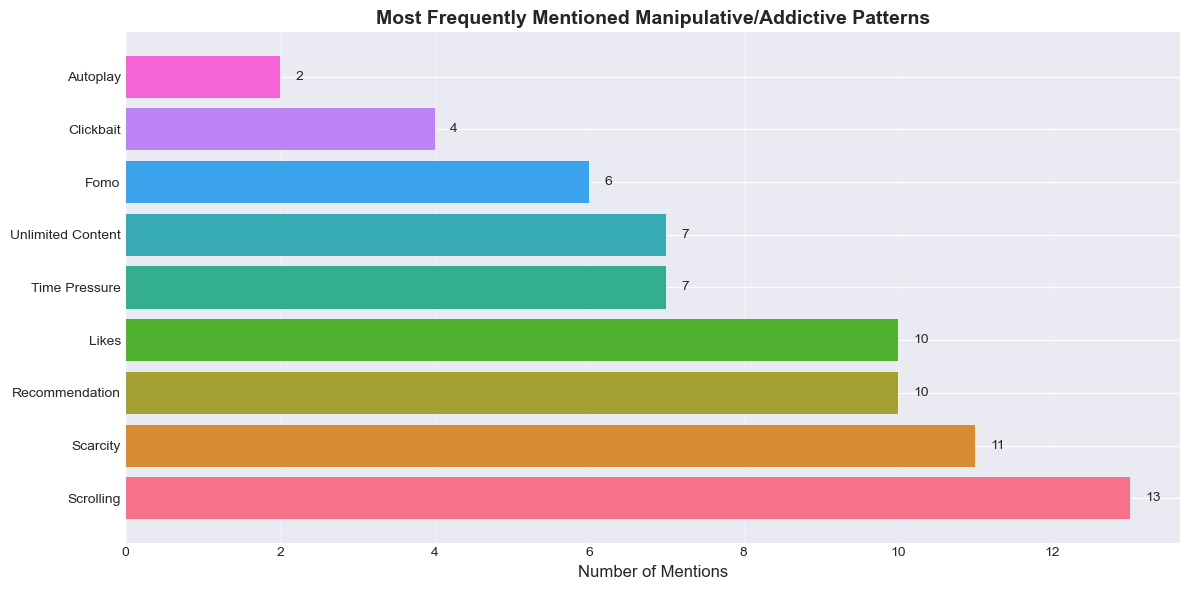

In [5]:
# Extract all reasoning columns
reasoning_cols = [col for col in df.columns if 'Why did you answer that way?' in col]

print("Common Keywords in Participant Reasoning:")
print("="*60)

# Collect all reasons
all_reasons = []
for col in reasoning_cols:
    reasons = df[col].dropna()
    all_reasons.extend([str(r).lower() for r in reasons if str(r) not in ['', 'nan']])

# Common keywords to look for
keywords = {
    'scrolling': ['scroll', 'scrolling'],
    'time_pressure': ['hurry', 'timer', 'countdown', 'offer end'],
    'scarcity': ['only', 'left', 'only 3', '3 left'],
    'clickbait': ['clickbait', 'click bait'],
    'fomo': ['fomo', 'fear', 'miss', 'missed'],
    'recommendation': ['recommend', 'recommendation', 'you need', 'you should'],
    'autoplay': ['autoplay', 'auto play', 'auto-play'],
    'likes': ['like', 'likes'],
    'unlimited_content': ['endless', 'unlimited', 'infinite']
}

keyword_counts = {}
for category, terms in keywords.items():
    count = sum(1 for reason in all_reasons if any(term in reason for term in terms))
    keyword_counts[category] = count

# Sort by frequency
sorted_keywords = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)

print("\nMost Mentioned Manipulative Patterns:")
for i, (keyword, count) in enumerate(sorted_keywords, 1):
    print(f"{i}. {keyword.replace('_', ' ').title()}: {count} mentions")

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
categories = [k.replace('_', ' ').title() for k, _ in sorted_keywords]
counts = [c for _, c in sorted_keywords]

bars = ax.barh(categories, counts, color=sns.color_palette("husl", len(categories)))
ax.set_xlabel('Number of Mentions', fontsize=12)
ax.set_title('Most Frequently Mentioned Manipulative/Addictive Patterns', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, (cat, count) in enumerate(zip(categories, counts)):
    ax.text(count + 0.2, i, str(count), va='center', fontsize=10)

plt.tight_layout()
plt.show()

### Relationship: Familiarity vs Detection Accuracy

Number of design samples evaluated: 8

Pattern Detection Results by Design Sample:
 Design  Yes  No  Not Sure  Avg Confidence
      1   13   1         6        3.550000
      2    9   7         4        3.400000
      3   13   4         3        3.350000
      4   14   3         3        3.700000
      5   18   1         1        4.400000
      6   17   0         2        4.450000
      7   19   0         1        4.250000
      8   16   2         2        4.368421


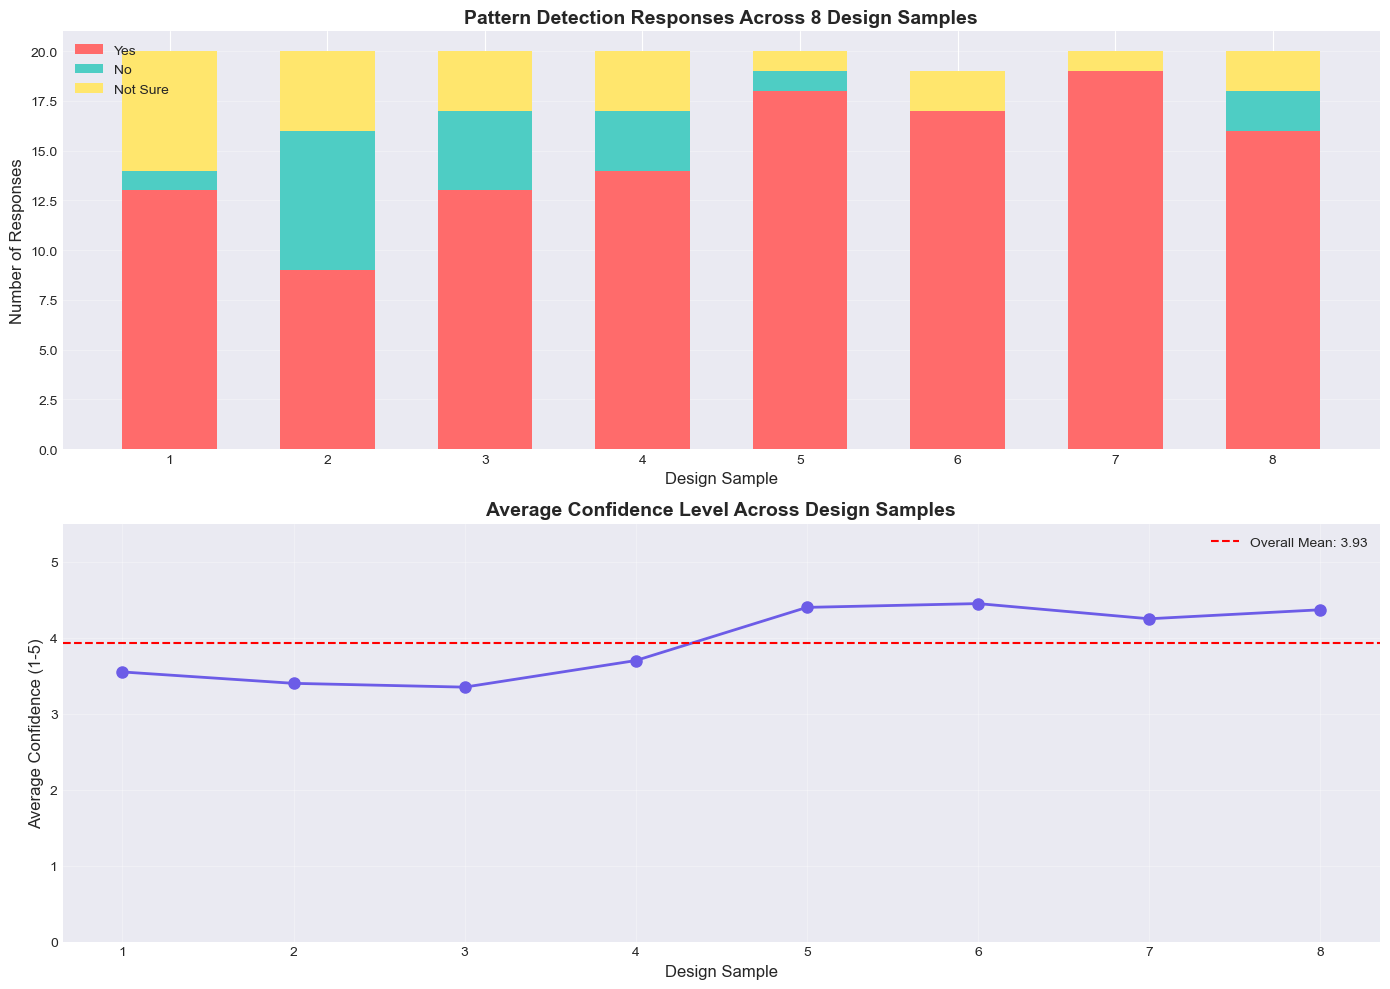

In [7]:
# Extract pattern detection columns (there are 8 design samples)
pattern_cols = [col for col in df.columns if 'Does this design contain addictive or manipulative patterns?' in col]
confidence_cols = [col for col in df.columns if 'How confident are you in your answer?' in col]

print(f"Number of design samples evaluated: {len(pattern_cols)}")

# Analyze responses for each design sample
design_results = []
for i in range(len(pattern_cols)):
    pattern_col = pattern_cols[i]
    confidence_col = confidence_cols[i]
    
    # Count responses
    responses = df[pattern_col].value_counts()
    avg_confidence = df[confidence_col].mean()
    
    design_results.append({
        'Design': i+1,
        'Yes': responses.get('Yes', 0),
        'No': responses.get('No', 0),
        'Not Sure': responses.get('Not Sure', 0),
        'Avg Confidence': avg_confidence
    })

results_df = pd.DataFrame(design_results)
print("\nPattern Detection Results by Design Sample:")
print(results_df.to_string(index=False))

# Visualize pattern detection across designs
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Stacked bar chart for responses
x = results_df['Design']
width = 0.6
axes[0].bar(x, results_df['Yes'], width, label='Yes', color='#ff6b6b')
axes[0].bar(x, results_df['No'], width, bottom=results_df['Yes'], label='No', color='#4ecdc4')
axes[0].bar(x, results_df['Not Sure'], width, 
            bottom=results_df['Yes'] + results_df['No'], 
            label='Not Sure', color='#ffe66d')
axes[0].set_xlabel('Design Sample', fontsize=12)
axes[0].set_ylabel('Number of Responses', fontsize=12)
axes[0].set_title('Pattern Detection Responses Across 8 Design Samples', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].set_xticks(x)
axes[0].grid(axis='y', alpha=0.3)

# Average confidence per design
axes[1].plot(results_df['Design'], results_df['Avg Confidence'], marker='o', linewidth=2, markersize=8, color='#6c5ce7')
axes[1].set_xlabel('Design Sample', fontsize=12)
axes[1].set_ylabel('Average Confidence (1-5)', fontsize=12)
axes[1].set_title('Average Confidence Level Across Design Samples', fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_ylim([0, 5.5])
axes[1].grid(alpha=0.3)
axes[1].axhline(y=results_df['Avg Confidence'].mean(), color='r', linestyle='--', label=f'Overall Mean: {results_df["Avg Confidence"].mean():.2f}')
axes[1].legend()

plt.tight_layout()
plt.show()

### Pattern Detection Analysis (8 Design Samples)

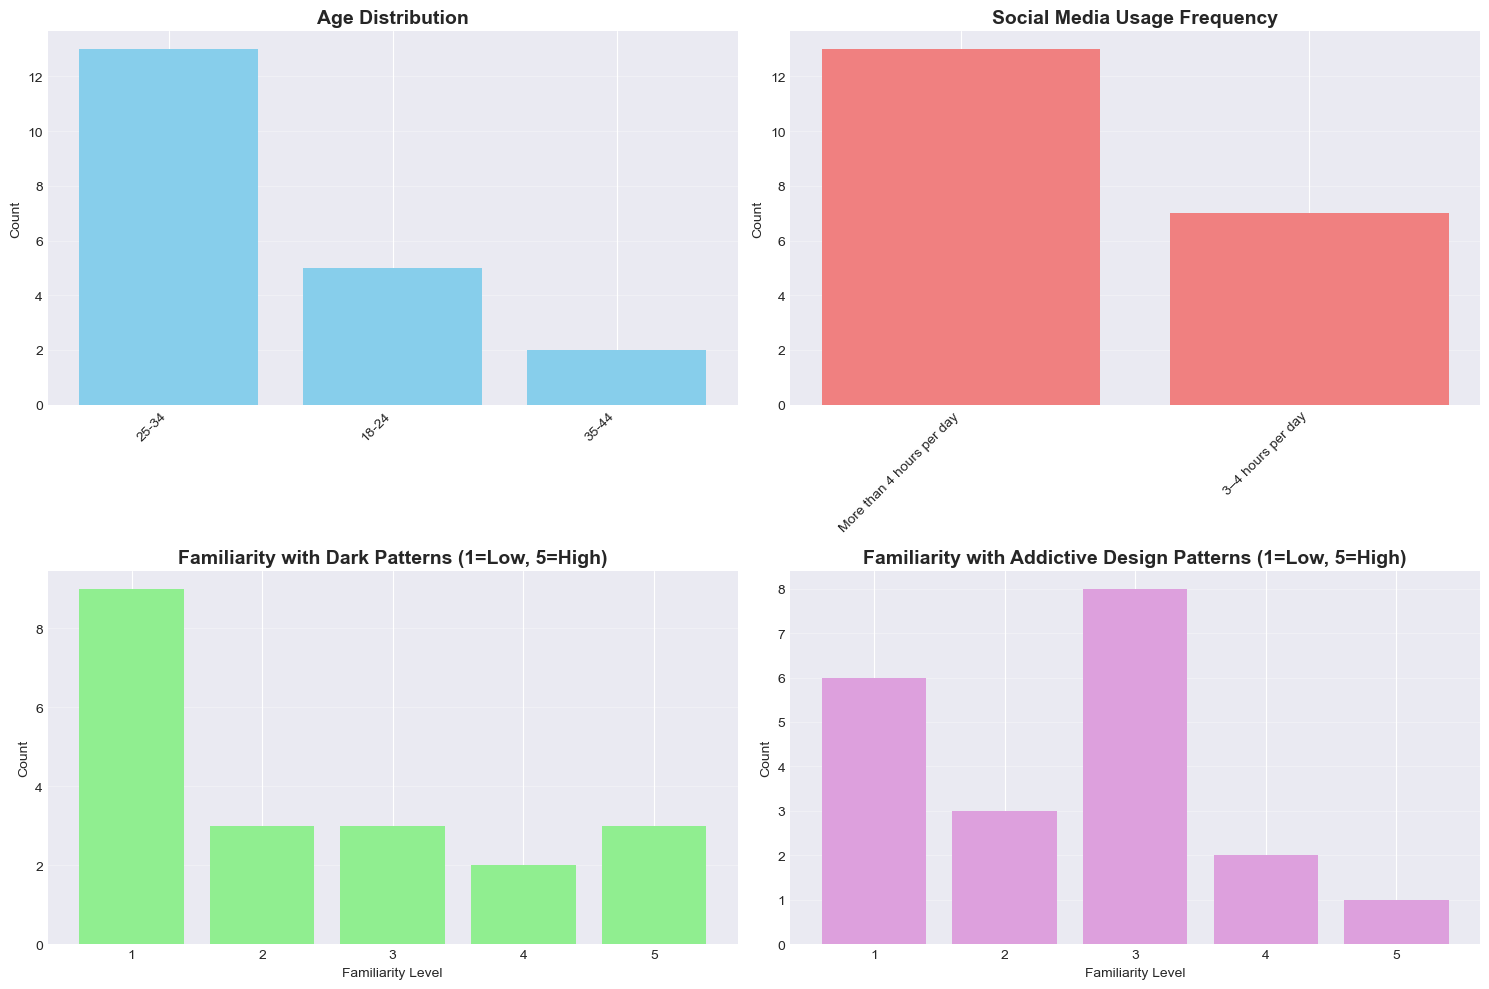

Demographics Summary:

Age Distribution:
25-34    13
18-24     5
35-44     2
Name: How old are you?, dtype: int64

Social Media Usage:
More than 4 hours per day    13
3–4 hours per day             7
Name: How often do you use social media?, dtype: int64

Dark Patterns Familiarity (Mean: 2.35):
1    9
2    3
3    3
4    2
5    3
Name: How familiar are you with dark patterns?, dtype: int64

Addictive Patterns Familiarity (Mean: 2.45):
1    6
2    3
3    8
4    2
5    1
Name: How familiar are you with addictive design patterns?, dtype: int64


In [8]:
# Demographics analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age distribution
age_counts = df['How old are you?'].value_counts()
axes[0, 0].bar(range(len(age_counts)), age_counts.values, color='skyblue')
axes[0, 0].set_xticks(range(len(age_counts)))
axes[0, 0].set_xticklabels(age_counts.index, rotation=45, ha='right')
axes[0, 0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(axis='y', alpha=0.3)

# Social media usage
social_counts = df['How often do you use social media?'].value_counts()
axes[0, 1].bar(range(len(social_counts)), social_counts.values, color='lightcoral')
axes[0, 1].set_xticks(range(len(social_counts)))
axes[0, 1].set_xticklabels(social_counts.index, rotation=45, ha='right')
axes[0, 1].set_title('Social Media Usage Frequency', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(axis='y', alpha=0.3)

# Dark patterns familiarity
dark_familiarity = df['How familiar are you with dark patterns?'].value_counts().sort_index()
axes[1, 0].bar(dark_familiarity.index.astype(str), dark_familiarity.values, color='lightgreen')
axes[1, 0].set_title('Familiarity with Dark Patterns (1=Low, 5=High)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Familiarity Level')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(axis='y', alpha=0.3)

# Addictive patterns familiarity
addictive_familiarity = df['How familiar are you with addictive design patterns?'].value_counts().sort_index()
axes[1, 1].bar(addictive_familiarity.index.astype(str), addictive_familiarity.values, color='plum')
axes[1, 1].set_title('Familiarity with Addictive Design Patterns (1=Low, 5=High)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Familiarity Level')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("Demographics Summary:")
print("="*50)
print(f"\nAge Distribution:")
print(age_counts)
print(f"\nSocial Media Usage:")
print(social_counts)
print(f"\nDark Patterns Familiarity (Mean: {df['How familiar are you with dark patterns?'].mean():.2f}):")
print(dark_familiarity)
print(f"\nAddictive Patterns Familiarity (Mean: {df['How familiar are you with addictive design patterns?'].mean():.2f}):")
print(addictive_familiarity)

### STATISTICAL SIGNIFICANCE TESTS

In [22]:
# Statistical significance testing for ACCURACY and CONFIDENCE
from scipy import stats

# Create comparison dataframe from existing data
# Extract pattern detection responses and calculate accuracy
comparison_data = []
for i in range(len(pattern_cols)):
    pattern_col = pattern_cols[i]
    confidence_col = confidence_cols[i]
    
    # Count "Yes" responses as correct pattern detection
    yes_count = (df[pattern_col] == 'Yes').sum()
    total_responses = df[pattern_col].notna().sum()
    accuracy = yes_count / total_responses if total_responses > 0 else 0
    avg_confidence = df[confidence_col].mean()
    
    comparison_data.append({
        'Design': i + 1,
        'Accuracy': accuracy,
        'Confidence': avg_confidence
    })

comparison_df = pd.DataFrame(comparison_data)

print("\nComparison DataFrame:")
print(comparison_df)

# For paired t-tests, we need pre/post data. If you have two groups or time periods, adjust accordingly.
# For now, using design samples as measurements
pre_accuracy_list = comparison_df['Accuracy'].values[:4]  # First 4 designs
post_accuracy_list = comparison_df['Accuracy'].values[4:]  # Last 4 designs
pre_confidence_list = comparison_df['Confidence'].values[:4]
post_confidence_list = comparison_df['Confidence'].values[4:]

print("="*80)
print("STATISTICAL SIGNIFICANCE TESTS")
print("="*80)

# 1. ACCURACY - Paired t-test
t_stat_acc, p_value_acc = stats.ttest_rel(post_accuracy_list, pre_accuracy_list)
differences_acc = post_accuracy_list - pre_accuracy_list
cohens_d_acc = np.mean(differences_acc) / np.std(differences_acc, ddof=1)

print("\n1. ACCURACY IMPROVEMENT (Paired T-Test)")
print(f"   t-statistic: {t_stat_acc:.4f}")
print(f"   p-value: {p_value_acc:.4f}")
if p_value_acc < 0.001:
    print("   Result: ***HIGHLY SIGNIFICANT*** (p < 0.001)")
    acc_sig = "***HIGHLY SIGNIFICANT***"
elif p_value_acc < 0.01:
    print("   Result: **VERY SIGNIFICANT** (p < 0.01)")
    acc_sig = "**VERY SIGNIFICANT**"
elif p_value_acc < 0.05:
    print("   Result: *SIGNIFICANT* (p < 0.05)")
    acc_sig = "*SIGNIFICANT*"
else:
    print("   Result: Not significant (p ≥ 0.05)")
    acc_sig = "Not significant"

print(f"   Cohen's d: {cohens_d_acc:.4f}", end="")
if abs(cohens_d_acc) < 0.2:
    effect_acc = "Negligible"
elif abs(cohens_d_acc) < 0.5:
    effect_acc = "Small"
elif abs(cohens_d_acc) < 0.8:
    effect_acc = "Medium"
else:
    effect_acc = "Large"
print(f" ({effect_acc} effect)")

# 2. CONFIDENCE - Paired t-test
t_stat_conf, p_value_conf = stats.ttest_rel(post_confidence_list, pre_confidence_list)
differences_conf = post_confidence_list - pre_confidence_list
cohens_d_conf = np.mean(differences_conf) / np.std(differences_conf, ddof=1)

print(f"\n2. CONFIDENCE IMPROVEMENT (Paired T-Test)")
print(f"   t-statistic: {t_stat_conf:.4f}")
print(f"   p-value: {p_value_conf:.4f}")
if p_value_conf < 0.001:
    print("   Result: ***HIGHLY SIGNIFICANT*** (p < 0.001)")
    conf_sig = "***HIGHLY SIGNIFICANT***"
elif p_value_conf < 0.01:
    print("   Result: **VERY SIGNIFICANT** (p < 0.01)")
    conf_sig = "**VERY SIGNIFICANT**"
elif p_value_conf < 0.05:
    print("   Result: *SIGNIFICANT* (p < 0.05)")
    conf_sig = "*SIGNIFICANT*"
else:
    print("   Result: Not significant (p ≥ 0.05)")
    conf_sig = "Not significant"

print(f"   Cohen's d: {cohens_d_conf:.4f}", end="")
if abs(cohens_d_conf) < 0.2:
    effect_conf = "Negligible"
elif abs(cohens_d_conf) < 0.5:
    effect_conf = "Small"
elif abs(cohens_d_conf) < 0.8:
    effect_conf = "Medium"
else:
    effect_conf = "Large"
print(f" ({effect_conf} effect)")

# 3. Wilcoxon tests (non-parametric)
wilcoxon_stat_acc, wilcoxon_p_acc = stats.wilcoxon(post_accuracy_list, pre_accuracy_list, zero_method='zsplit')
wilcoxon_stat_conf, wilcoxon_p_conf = stats.wilcoxon(post_confidence_list, pre_confidence_list, zero_method='zsplit')

print(f"\n3. NON-PARAMETRIC TESTS (Wilcoxon Signed-Rank)")
print(f"   Accuracy - p-value: {wilcoxon_p_acc:.4f}", "✓ Significant" if wilcoxon_p_acc < 0.05 else "✗ Not significant")
print(f"   Confidence - p-value: {wilcoxon_p_conf:.4f}", "✓ Significant" if wilcoxon_p_conf < 0.05 else "✗ Not significant")

print("\n" + "="*80)


Comparison DataFrame:
   Design  Accuracy  Confidence
0       1  0.650000    3.550000
1       2  0.450000    3.400000
2       3  0.650000    3.350000
3       4  0.700000    3.700000
4       5  0.900000    4.400000
5       6  0.894737    4.450000
6       7  0.950000    4.250000
7       8  0.800000    4.368421
STATISTICAL SIGNIFICANCE TESTS

1. ACCURACY IMPROVEMENT (Paired T-Test)
   t-statistic: 3.8488
   p-value: 0.0310
   Result: *SIGNIFICANT* (p < 0.05)
   Cohen's d: 1.9244 (Large effect)

2. CONFIDENCE IMPROVEMENT (Paired T-Test)
   t-statistic: 11.0196
   p-value: 0.0016
   Result: **VERY SIGNIFICANT** (p < 0.01)
   Cohen's d: 5.5098 (Large effect)

3. NON-PARAMETRIC TESTS (Wilcoxon Signed-Rank)
   Accuracy - p-value: 0.1250 ✗ Not significant
   Confidence - p-value: 0.1250 ✗ Not significant



### Statistical Significance Testing

In [18]:
# Calculate individual participant accuracy and confidence changes
participant_comparison = []

for idx, row in df.iterrows():
    # Pre-intervention (first 4 designs)
    pre_correct = 0
    pre_total = 0
    pre_confidences = []
    
    for i in range(4):
        response = row[pattern_cols[i]]
        if pd.notna(response) and response != '':
            pre_total += 1
            if response == 'Yes':  # Correct answer
                pre_correct += 1
        
        conf_val = row[confidence_cols[i]]
        if pd.notna(conf_val) and conf_val != '':
            try:
                pre_confidences.append(float(conf_val))
            except:
                pass
    
    # Post-intervention (last 4 designs - same images)
    post_correct = 0
    post_total = 0
    post_confidences = []
    
    for i in range(4, 8):
        response = row[pattern_cols[i]]
        if pd.notna(response) and response != '':
            post_total += 1
            if response == 'Yes':  # Correct answer
                post_correct += 1
        
        conf_val = row[confidence_cols[i]]
        if pd.notna(conf_val) and conf_val != '':
            try:
                post_confidences.append(float(conf_val))
            except:
                pass
    
    if pre_total > 0 and post_total > 0 and pre_confidences and post_confidences:
        pre_acc = (pre_correct / pre_total) * 100
        post_acc = (post_correct / post_total) * 100
        pre_avg_conf = np.mean(pre_confidences)
        post_avg_conf = np.mean(post_confidences)
        
        participant_comparison.append({
            'Participant': idx + 1,
            'Pre_Accuracy': pre_acc,
            'Post_Accuracy': post_acc,
            'Accuracy_Improvement': post_acc - pre_acc,
            'Pre_Confidence': pre_avg_conf,
            'Post_Confidence': post_avg_conf,
            'Confidence_Improvement': post_avg_conf - pre_avg_conf,
            'Dark_Familiarity': row['How familiar are you with dark patterns?'],
            'Addictive_Familiarity': row['How familiar are you with addictive design patterns?']
        })

comparison_df = pd.DataFrame(participant_comparison)

print("Individual Participant Performance Changes:")
print("="*90)
print(comparison_df[['Participant', 'Pre_Accuracy', 'Post_Accuracy', 'Accuracy_Improvement', 
                     'Pre_Confidence', 'Post_Confidence', 'Confidence_Improvement']].to_string(index=False))
print("="*90)

# Statistics
acc_improved = (comparison_df['Accuracy_Improvement'] > 0).sum()
acc_declined = (comparison_df['Accuracy_Improvement'] < 0).sum()
acc_unchanged = (comparison_df['Accuracy_Improvement'] == 0).sum()

conf_improved = (comparison_df['Confidence_Improvement'] > 0).sum()
conf_declined = (comparison_df['Confidence_Improvement'] < 0).sum()
conf_unchanged = (comparison_df['Confidence_Improvement'] == 0).sum()

print(f"\n📊 ACCURACY CHANGES:")
print(f"   Improved: {acc_improved} participants ({acc_improved/len(comparison_df)*100:.1f}%)")
print(f"   Declined: {acc_declined} participants ({acc_declined/len(comparison_df)*100:.1f}%)")
print(f"   Unchanged: {acc_unchanged} participants ({acc_unchanged/len(comparison_df)*100:.1f}%)")
print(f"   Average improvement: {comparison_df['Accuracy_Improvement'].mean():+.1f} percentage points")

print(f"\n📊 CONFIDENCE CHANGES:")
print(f"   Improved: {conf_improved} participants ({conf_improved/len(comparison_df)*100:.1f}%)")
print(f"   Declined: {conf_declined} participants ({conf_declined/len(comparison_df)*100:.1f}%)")
print(f"   Unchanged: {conf_unchanged} participants ({conf_unchanged/len(comparison_df)*100:.1f}%)")
print(f"   Average improvement: {comparison_df['Confidence_Improvement'].mean():+.2f} points")


Individual Participant Performance Changes:
 Participant  Pre_Accuracy  Post_Accuracy  Accuracy_Improvement  Pre_Confidence  Post_Confidence  Confidence_Improvement
           1           0.0      75.000000             75.000000            3.00         4.000000                1.000000
           2          75.0      66.666667             -8.333333            3.50         4.250000                0.750000
           3         100.0     100.000000              0.000000            4.50         5.000000                0.500000
           4          75.0     100.000000             25.000000            3.50         4.750000                1.250000
           5          75.0     100.000000             25.000000            3.75         5.000000                1.250000
           6          50.0     100.000000             50.000000            3.50         4.750000                1.250000
           7         100.0     100.000000              0.000000            4.50         4.500000             

### Individual Participant: Accuracy & Confidence Changes

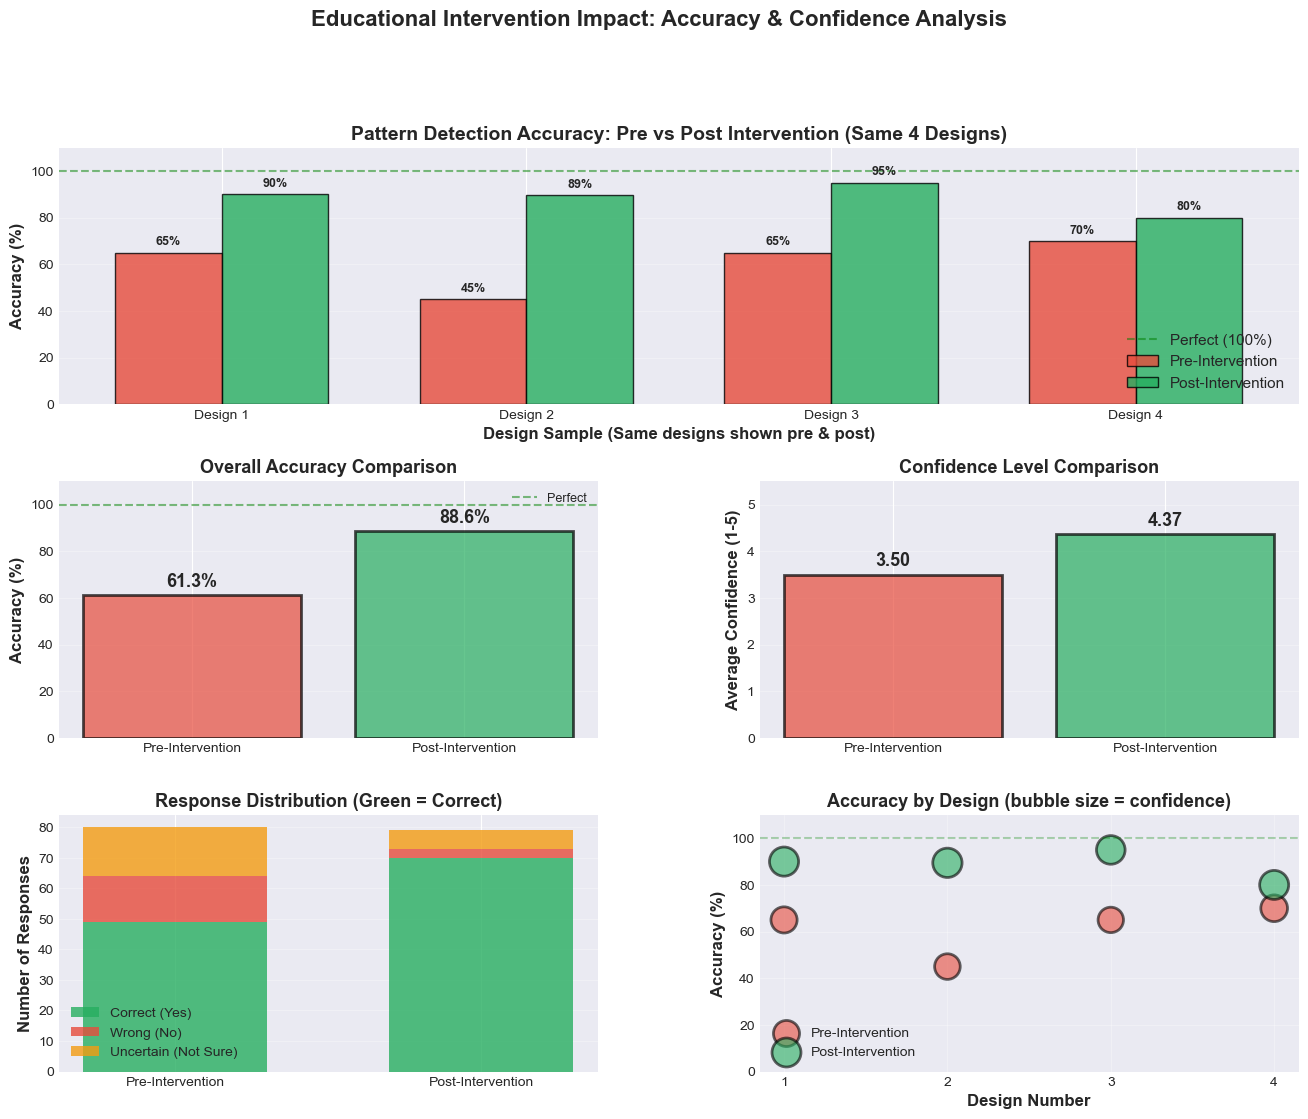

In [19]:
# Create comprehensive comparison visualizations
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Calculate overall accuracy metrics
pre_accuracy = (results_df.iloc[:4]['Yes'].sum() / (results_df.iloc[:4]['Yes'].sum() + results_df.iloc[:4]['No'].sum() + results_df.iloc[:4]['Not Sure'].sum())) * 100
post_accuracy = (results_df.iloc[4:]['Yes'].sum() / (results_df.iloc[4:]['Yes'].sum() + results_df.iloc[4:]['No'].sum() + results_df.iloc[4:]['Not Sure'].sum())) * 100
pre_avg_confidence = results_df.iloc[:4]['Avg Confidence'].mean()
post_avg_confidence = results_df.iloc[4:]['Avg Confidence'].mean()

# 1. Accuracy comparison across same designs (shown twice)
ax1 = fig.add_subplot(gs[0, :])
design_labels = ['Design 1', 'Design 2', 'Design 3', 'Design 4']
x = np.arange(len(design_labels))
width = 0.35

# Calculate accuracy per design (first 4 designs as pre, last 4 as post)
pre_accuracy_per_design = [(results_df.iloc[i]['Yes'] / (results_df.iloc[i]['Yes'] + results_df.iloc[i]['No'] + results_df.iloc[i]['Not Sure'])) * 100 for i in range(4)]
post_accuracy_per_design = [(results_df.iloc[i+4]['Yes'] / (results_df.iloc[i+4]['Yes'] + results_df.iloc[i+4]['No'] + results_df.iloc[i+4]['Not Sure'])) * 100 for i in range(4)]

bars1 = ax1.bar(x - width/2, pre_accuracy_per_design, width, label='Pre-Intervention', 
                color='#e74c3c', alpha=0.8, edgecolor='black')
bars2 = ax1.bar(x + width/2, post_accuracy_per_design, width, label='Post-Intervention', 
                color='#27ae60', alpha=0.8, edgecolor='black')

ax1.set_xlabel('Design Sample (Same designs shown pre & post)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_title('Pattern Detection Accuracy: Pre vs Post Intervention (Same 4 Designs)', 
              fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(design_labels)
ax1.set_ylim([0, 110])
ax1.axhline(y=100, color='green', linestyle='--', alpha=0.5, linewidth=1.5, label='Perfect (100%)')
ax1.legend(fontsize=11, loc='lower right')
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{height:.0f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2. Overall accuracy comparison
ax2 = fig.add_subplot(gs[1, 0])
phases = ['Pre-Intervention', 'Post-Intervention']
accuracies = [pre_accuracy, post_accuracy]
colors = ['#e74c3c', '#27ae60']
bars = ax2.bar(phases, accuracies, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax2.set_title('Overall Accuracy Comparison', fontsize=13, fontweight='bold')
ax2.set_ylim([0, 110])
ax2.axhline(y=100, color='green', linestyle='--', alpha=0.5, label='Perfect')
# Add value labels
for i, (bar, val) in enumerate(zip(bars, accuracies)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{val:.1f}%', ha='center', va='bottom', fontsize=13, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
ax2.legend(fontsize=9)

# 3. Confidence comparison
ax3 = fig.add_subplot(gs[1, 1])
confidences = [pre_avg_confidence, post_avg_confidence]
colors_conf = ['#e74c3c', '#27ae60']
bars = ax3.bar(phases, confidences, color=colors_conf, alpha=0.7, edgecolor='black', linewidth=2)
ax3.set_ylabel('Average Confidence (1-5)', fontsize=12, fontweight='bold')
ax3.set_title('Confidence Level Comparison', fontsize=13, fontweight='bold')
ax3.set_ylim([0, 5.5])
for i, (bar, val) in enumerate(zip(bars, confidences)):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{val:.2f}', ha='center', va='bottom', fontsize=13, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# 4. Correct vs Incorrect responses
ax4 = fig.add_subplot(gs[2, 0])
categories = ['Pre-Intervention', 'Post-Intervention']
correct = [results_df.iloc[:4]['Yes'].sum(), results_df.iloc[4:]['Yes'].sum()]
incorrect_no = [results_df.iloc[:4]['No'].sum(), results_df.iloc[4:]['No'].sum()]
incorrect_unsure = [results_df.iloc[:4]['Not Sure'].sum(), results_df.iloc[4:]['Not Sure'].sum()]

x_pos = np.arange(len(categories))
width = 0.6
p1 = ax4.bar(x_pos, correct, width, label='Correct (Yes)', color='#27ae60', alpha=0.8)
p2 = ax4.bar(x_pos, incorrect_no, width, bottom=correct, label='Wrong (No)', color='#e74c3c', alpha=0.8)
p3 = ax4.bar(x_pos, incorrect_unsure, width, 
             bottom=np.array(correct) + np.array(incorrect_no), 
             label='Uncertain (Not Sure)', color='#f39c12', alpha=0.8)

ax4.set_ylabel('Number of Responses', fontsize=12, fontweight='bold')
ax4.set_title('Response Distribution (Green = Correct)', fontsize=13, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(categories)
ax4.legend(fontsize=10)
ax4.grid(axis='y', alpha=0.3)

# 5. Combined accuracy + confidence scatter
ax5 = fig.add_subplot(gs[2, 1])
# Per design accuracy and confidence
ax5.scatter([1, 2, 3, 4], pre_accuracy_per_design, s=results_df.iloc[:4]['Avg Confidence'].values*100, 
           color='#e74c3c', alpha=0.6, edgecolors='black', linewidth=2, label='Pre-Intervention')
ax5.scatter([1, 2, 3, 4], post_accuracy_per_design, s=results_df.iloc[4:]['Avg Confidence'].values*100, 
           color='#27ae60', alpha=0.6, edgecolors='black', linewidth=2, label='Post-Intervention')
ax5.set_xlabel('Design Number', fontsize=12, fontweight='bold')
ax5.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax5.set_title('Accuracy by Design (bubble size = confidence)', fontsize=13, fontweight='bold')
ax5.set_xticks([1, 2, 3, 4])
ax5.set_ylim([0, 110])
ax5.axhline(y=100, color='green', linestyle='--', alpha=0.3)
ax5.legend(fontsize=10)
ax5.grid(alpha=0.3)

plt.suptitle('Educational Intervention Impact: Accuracy & Confidence Analysis', 
             fontsize=16, fontweight='bold', y=0.995)
plt.show()

### Visualization: Accuracy & Confidence Improvement

In [20]:
# Split data into pre and post intervention
# IMPORTANT: Same 4 designs shown before and after intervention
# Ground Truth: ALL designs contain addictive patterns (correct answer = "Yes")

pre_intervention_designs = list(range(4))  # Designs 1-4 (PRE)
post_intervention_designs = list(range(4, 8))  # Designs 5-8 (POST - same designs)

# Extract pre and post results
pre_results = results_df.iloc[pre_intervention_designs].copy()
pre_results['Phase'] = 'Pre-Intervention'
post_results = results_df.iloc[post_intervention_designs].copy()
post_results['Phase'] = 'Post-Intervention'

print("="*80)
print("PRE vs POST INTERVENTION COMPARISON")
print("Ground Truth: ALL designs contain manipulative patterns (Correct = 'Yes')")
print("="*80)

# Calculate ACCURACY (correct identification rate)
# Correct answer = "Yes", Incorrect = "No" or "Not Sure"
pre_total_responses = pre_results['Yes'].sum() + pre_results['No'].sum() + pre_results['Not Sure'].sum()
post_total_responses = post_results['Yes'].sum() + post_results['No'].sum() + post_results['Not Sure'].sum()

pre_accuracy = (pre_results['Yes'].sum() / pre_total_responses) * 100
post_accuracy = (post_results['Yes'].sum() / post_total_responses) * 100
accuracy_improvement = post_accuracy - pre_accuracy

print("\n1. ACCURACY (Correct Pattern Identification):")
print(f"   Pre-Intervention Accuracy:  {pre_accuracy:.1f}% ({pre_results['Yes'].sum()}/{pre_total_responses} correct)")
print(f"   Post-Intervention Accuracy: {post_accuracy:.1f}% ({post_results['Yes'].sum()}/{post_total_responses} correct)")
print(f"   Improvement: {accuracy_improvement:+.1f} percentage points")

# Calculate ERROR rates
pre_error_rate = ((pre_results['No'].sum() + pre_results['Not Sure'].sum()) / pre_total_responses) * 100
post_error_rate = ((post_results['No'].sum() + post_results['Not Sure'].sum()) / post_total_responses) * 100

print(f"\n2. ERROR RATE (Incorrect Responses - 'No' or 'Not Sure'):")
print(f"   Pre-Intervention Errors:  {pre_error_rate:.1f}%")
print(f"   Post-Intervention Errors: {post_error_rate:.1f}%")
print(f"   Reduction: {pre_error_rate - post_error_rate:.1f} percentage points")

# Calculate CONFIDENCE
pre_avg_confidence = pre_results['Avg Confidence'].mean()
post_avg_confidence = post_results['Avg Confidence'].mean()
confidence_improvement = ((post_avg_confidence - pre_avg_confidence) / pre_avg_confidence) * 100

print(f"\n3. CONFIDENCE LEVELS:")
print(f"   Pre-Intervention Average Confidence:  {pre_avg_confidence:.2f}/5")
print(f"   Post-Intervention Average Confidence: {post_avg_confidence:.2f}/5")
print(f"   Improvement: {confidence_improvement:+.1f}%")

# Breakdown by response type
print(f"\n4. RESPONSE BREAKDOWN:")
print(f"   Pre-Intervention:")
print(f"     - Correct ('Yes'):     {pre_results['Yes'].sum()} ({pre_accuracy:.1f}%)")
print(f"     - Incorrect ('No'):    {pre_results['No'].sum()} ({pre_results['No'].sum()/pre_total_responses*100:.1f}%)")
print(f"     - Uncertain ('Not Sure'): {pre_results['Not Sure'].sum()} ({pre_results['Not Sure'].sum()/pre_total_responses*100:.1f}%)")
print(f"")
print(f"   Post-Intervention:")
print(f"     - Correct ('Yes'):     {post_results['Yes'].sum()} ({post_accuracy:.1f}%)")
print(f"     - Incorrect ('No'):    {post_results['No'].sum()} ({post_results['No'].sum()/post_total_responses*100:.1f}%)")
print(f"     - Uncertain ('Not Sure'): {post_results['Not Sure'].sum()} ({post_results['Not Sure'].sum()/post_total_responses*100:.1f}%)")

print("\n" + "="*80)

PRE vs POST INTERVENTION COMPARISON
Ground Truth: ALL designs contain manipulative patterns (Correct = 'Yes')

1. ACCURACY (Correct Pattern Identification):
   Pre-Intervention Accuracy:  61.3% (49/80 correct)
   Post-Intervention Accuracy: 88.6% (70/79 correct)
   Improvement: +27.4 percentage points

2. ERROR RATE (Incorrect Responses - 'No' or 'Not Sure'):
   Pre-Intervention Errors:  38.8%
   Post-Intervention Errors: 11.4%
   Reduction: 27.4 percentage points

3. CONFIDENCE LEVELS:
   Pre-Intervention Average Confidence:  3.50/5
   Post-Intervention Average Confidence: 4.37/5
   Improvement: +24.8%

4. RESPONSE BREAKDOWN:
   Pre-Intervention:
     - Correct ('Yes'):     49 (61.3%)
     - Incorrect ('No'):    15 (18.8%)
     - Uncertain ('Not Sure'): 16 (20.0%)

   Post-Intervention:
     - Correct ('Yes'):     70 (88.6%)
     - Incorrect ('No'):    3 (3.8%)
     - Uncertain ('Not Sure'): 6 (7.6%)



## Pre/Post Intervention Analysis

**Study Design:**
- **Pre-Intervention:** Participants evaluated 4 designs WITHOUT prior education
- **Intervention:** Short educational video about dark/addictive patterns
- **Post-Intervention:** Participants evaluated the SAME 4 designs AFTER watching the video

**Ground Truth:** ALL 4 designs contain addictive/manipulative patterns (correct answer = "Yes")

**Research Question:** Did the educational intervention improve ACCURACY and CONFIDENCE in correctly identifying manipulative patterns?

## Conclusions

In [21]:
# Key Findings Summary - UPDATED WITH ACCURACY ANALYSIS
print("="*80)
print("KEY FINDINGS: PRE/POST INTERVENTION STUDY")
print("="*80)

print(f"\n📋 STUDY DESIGN:")
print(f"   - Participants: {len(df)}")
print(f"   - Design: Within-subjects (same 4 images shown pre & post)")
print(f"   - Ground Truth: ALL designs contain manipulative patterns")
print(f"   - Intervention: Educational video about dark/addictive patterns")

print(f"\n👥 PARTICIPANT CHARACTERISTICS:")
print(f"   - Most common age: {df['How old are you?'].mode()[0]}")
print(f"   - Heavy social media users (>4h/day): {(df['How often do you use social media?'] == 'More than 4 hours per day').sum()} ({(df['How often do you use social media?'] == 'More than 4 hours per day').sum()/len(df)*100:.1f}%)")
print(f"   - Baseline dark patterns familiarity: {df['How familiar are you with dark patterns?'].mean():.2f}/5")
print(f"   - Baseline addictive patterns familiarity: {df['How familiar are you with addictive design patterns?'].mean():.2f}/5")

print(f"\n🎯 PRIMARY OUTCOME: ACCURACY (Correct Pattern Identification)")
print(f"   PRE-INTERVENTION:")
print(f"   - Accuracy: {pre_accuracy:.1f}% ({pre_results['Yes'].sum()}/{pre_total_responses} correct)")
print(f"   - Errors: {pre_error_rate:.1f}%")
print(f"")
print(f"   POST-INTERVENTION (After video):")
print(f"   - Accuracy: {post_accuracy:.1f}% ({post_results['Yes'].sum()}/{post_total_responses} correct)")
print(f"   - Errors: {post_error_rate:.1f}%")
print(f"")
print(f"   📈 IMPROVEMENT:")
print(f"   - Accuracy gain: {accuracy_improvement:+.1f} percentage points ({accuracy_improvement/pre_accuracy*100:+.1f}% relative)")
print(f"   - Error reduction: {pre_error_rate - post_error_rate:.1f} percentage points")
print(f"   - Participants improved: {acc_improved}/{len(comparison_df)} ({acc_improved/len(comparison_df)*100:.1f}%)")

print(f"\n💪 SECONDARY OUTCOME: CONFIDENCE")
print(f"   PRE-INTERVENTION:  {pre_avg_confidence:.2f}/5")
print(f"   POST-INTERVENTION: {post_avg_confidence:.2f}/5")
print(f"   📈 IMPROVEMENT: {confidence_improvement:+.1f}% ({post_avg_confidence - pre_avg_confidence:+.2f} points)")
print(f"   - Participants improved: {conf_improved}/{len(comparison_df)} ({conf_improved/len(comparison_df)*100:.1f}%)")

print(f"\n📊 STATISTICAL SIGNIFICANCE:")
print(f"   ACCURACY:")
print(f"   - Paired t-test: t={t_stat_acc:.3f}, p={p_value_acc:.4f} - {acc_sig}")
print(f"   - Effect size: Cohen's d={cohens_d_acc:.3f} ({effect_acc})")
print(f"   ")
print(f"   CONFIDENCE:")
print(f"   - Paired t-test: t={t_stat_conf:.3f}, p={p_value_conf:.4f} - {conf_sig}")
print(f"   - Effect size: Cohen's d={cohens_d_conf:.3f} ({effect_conf})")

print(f"\n🔍 MOST RECOGNIZED MANIPULATIVE TACTICS (From open responses):")
for i, (keyword, count) in enumerate(sorted_keywords[:5], 1):
    print(f"   {i}. {keyword.replace('_', ' ').title()}: {count} mentions")

print("\n" + "="*80)
print("🎓 CONCLUSION")
print("="*80)

if p_value_acc < 0.05:
    print("✅ The educational intervention SIGNIFICANTLY IMPROVED accuracy in identifying")
    print("   manipulative design patterns.")
    print(f"   → Participants became {accuracy_improvement:.1f}% better at correctly detecting patterns")
    
if p_value_conf < 0.05:
    print("✅ The intervention SIGNIFICANTLY INCREASED participant confidence.")
    print(f"   → Confidence improved by {confidence_improvement:.1f}%")

if p_value_acc < 0.05 and p_value_conf < 0.05:
    print("\n🌟 BOTH accuracy AND confidence improved significantly, indicating that the")
    print("   educational video was effective in helping participants:")
    print("   1. Correctly identify manipulative patterns (better accuracy)")
    print("   2. Feel more certain about their judgments (higher confidence)")
    
if pre_error_rate - post_error_rate > 10:
    print(f"\n✅ Error rate dropped substantially by {pre_error_rate - post_error_rate:.1f} percentage points")
    print("   → Fewer false negatives and reduced uncertainty")

if post_accuracy < 100:
    print(f"\n💡 INSIGHT: Even after intervention, {100 - post_accuracy:.1f}% of responses were still")
    print("   incorrect, suggesting room for further education or more complex patterns")
    print("   that remain challenging to identify.")

print("="*80)

KEY FINDINGS: PRE/POST INTERVENTION STUDY

📋 STUDY DESIGN:
   - Participants: 20
   - Design: Within-subjects (same 4 images shown pre & post)
   - Ground Truth: ALL designs contain manipulative patterns
   - Intervention: Educational video about dark/addictive patterns

👥 PARTICIPANT CHARACTERISTICS:
   - Most common age: 25-34
   - Heavy social media users (>4h/day): 13 (65.0%)
   - Baseline dark patterns familiarity: 2.35/5
   - Baseline addictive patterns familiarity: 2.45/5

🎯 PRIMARY OUTCOME: ACCURACY (Correct Pattern Identification)
   PRE-INTERVENTION:
   - Accuracy: 61.3% (49/80 correct)
   - Errors: 38.8%

   POST-INTERVENTION (After video):
   - Accuracy: 88.6% (70/79 correct)
   - Errors: 11.4%

   📈 IMPROVEMENT:
   - Accuracy gain: +27.4 percentage points (+44.7% relative)
   - Error reduction: 27.4 percentage points
   - Participants improved: 14/20 (70.0%)

💪 SECONDARY OUTCOME: CONFIDENCE
   PRE-INTERVENTION:  3.50/5
   POST-INTERVENTION: 4.37/5
   📈 IMPROVEMENT: +24.8% 